In [1]:
from sklearn.datasets import load_digits # Load the MNIST-like dataset
from sklearn.preprocessing import StandardScaler # Normalize feature scaling
from sklearn.decomposition import PCA # Dimensionality reduction using PCA
from sklearn.cluster import KMeans # Apply K-Means clustering
import matplotlib.pyplot as plt # Visualization of clusters
from sklearn.cluster import KMeans # Compute inertia for elbow method
from sklearn_extra.cluster import KMedoids # K-Medoid clustering algorithm
from sklearn.metrics import pairwise_distances # Compute distance metrics (Euclidean, Manhattan, Cosin
from sklearn.utils import shuffle 
import pandas as pd
import numpy as np

In [2]:
df_original = pd.read_csv('Iris.csv')

In [3]:
df_original

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data = df_original.iloc[:,:4]
labels = df_original.iloc[:,4]

In [5]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(data)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
iris_dataset_2D = pd.DataFrame(X_pca,columns=['pca1','pca2'])

In [8]:
iris_dataset_2D

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [9]:
# df["Species"] = labels
labels_numbered = labels.copy()
labels_numbered.replace('Iris-setosa',0, inplace=True)
labels_numbered.replace('Iris-virginica',1, inplace=True)
labels_numbered.replace('Iris-versicolor',2, inplace=True)

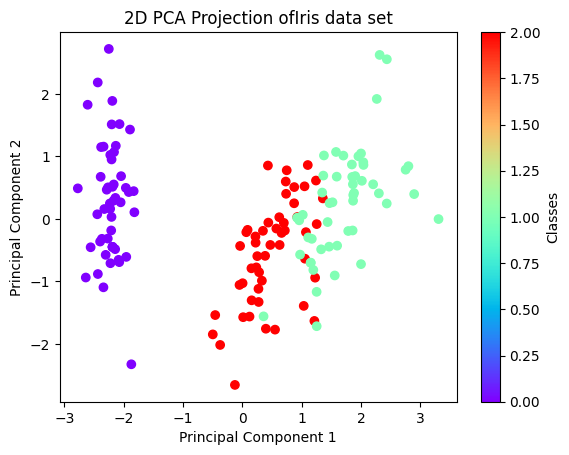

In [10]:
scatter = plt.scatter(iris_dataset_2D.iloc[:,0], iris_dataset_2D.iloc[:,1],c=labels_numbered, cmap="rainbow")
plt.colorbar(scatter, label="Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection ofIris data set")
plt.show()

In [11]:
# K-means on iris_dataset_2D
kmeans_initial = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans_initial.fit(X_pca)
my_labels = kmeans_initial.labels_
my_centers = np.array(kmeans_initial.cluster_centers_)

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/tmp/ipykernel_276392/3921724423.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(my_centers[:,0],my_centers[:,1],c='black', cmap="rainbow", marker='x')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


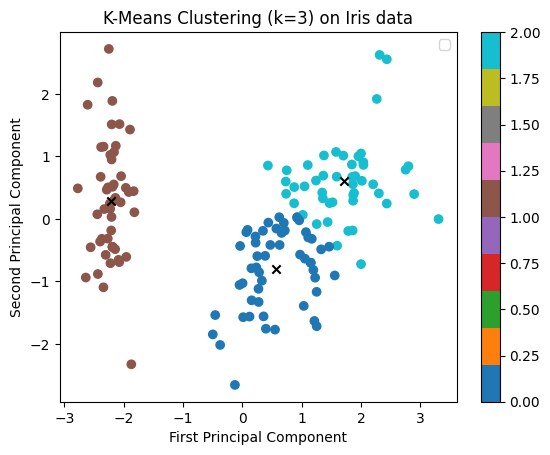

The sum of squared distances(inertia) of samples to their closest cluster centre in given k =3: 116.10924021401527


In [12]:
scatter = plt.scatter(iris_dataset_2D.iloc[:,0], iris_dataset_2D.iloc[:,1],c=my_labels, cmap="tab10")
plt.colorbar(scatter)
plt.scatter(my_centers[:,0],my_centers[:,1],c='black', cmap="rainbow", marker='x')
plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering (k=3) on Iris data')
plt.show()

print(f"The sum of squared distances(inertia) of samples to their closest cluster centre in given k =3: {kmeans_initial.inertia_}")

In [14]:
new_df = pd.DataFrame(data)  # Convert X to DataFrame if it's not
new_df['Actual_Label'] = labels  # Add actual labels
new_df['Cluster'] = kmeans_initial.labels_  # Assign clusters
new_df.replace('Iris-setosa',0, inplace=True)
new_df.replace('Iris-virginica',1, inplace=True)
new_df.replace('Iris-versicolor',2, inplace=True)

# Count actual labels in each cluster
cluster_label_counts = new_df.groupby('Actual_Label')['Cluster'].value_counts().unstack(fill_value=0)


# Get total number of samples
N = len(new_df)

# Compute the sum of maximum counts per cluster
max_counts = cluster_label_counts.max(axis=0).sum()
print("max_counts are:", max_counts)
# Calculate purity
purity_score = max_counts / N
print(f'Purity Score: {purity_score:.4f}')

# Print output
for cluster, label_counts in cluster_label_counts.items():
    print(f"Cluster {cluster}: {label_counts}")

max_counts are: 125
Purity Score: 0.8333
Cluster 0: Actual_Label
0     0
1    14
2    39
Name: 0, dtype: int64
Cluster 1: Actual_Label
0    50
1     0
2     0
Name: 1, dtype: int64
Cluster 2: Actual_Label
0     0
1    36
2    11
Name: 2, dtype: int64


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

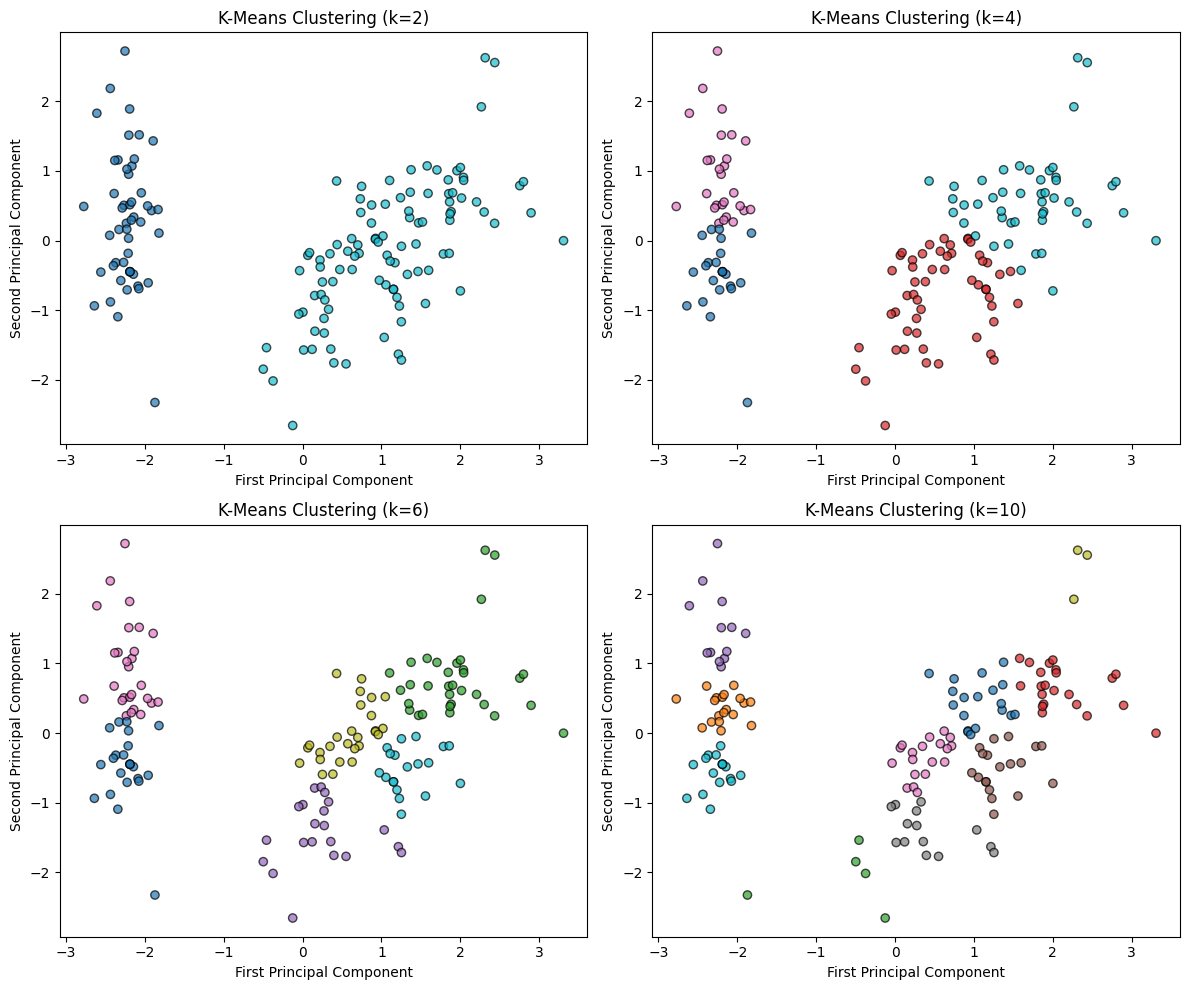

The sum of squared distances(inertia) of samples to their closest cluster centre : [198.70683592637363, 89.61989203184677, 57.273552789553754, 28.126006667829117]


In [15]:
# Define different values of k
k_values = [2, 4, 6, 10]
inertias = []

# Plot K-Means clustering results for each k
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, max_iter=50, random_state=42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    # Store inertia
    inertias.append(kmeans.inertia_)

    # Scatter plot for each k
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', edgecolor='k', alpha=0.7)
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')

# Adjust layout
plt.tight_layout()
plt.show()

print(f"The sum of squared distances(inertia) of samples to their closest cluster centre : {inertias}")

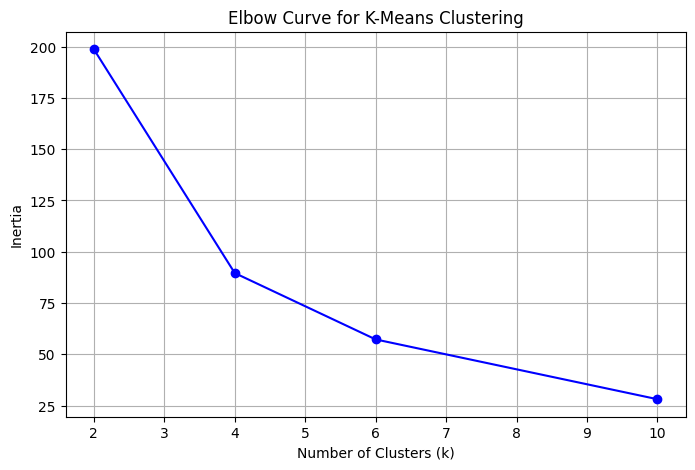

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)
plt.show()

In [17]:
 # Best k according to elbow method
kmeans_best = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans_best.fit(X_pca)
cluster_labels = kmeans_best.labels_

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
new_df2 = pd.DataFrame(data)
new_df2['Actual_Label'] = labels  
new_df2['Cluster'] = kmeans_best.labels_ 
new_df2.replace('Iris-setosa',0, inplace=True)
new_df2.replace('Iris-virginica',1, inplace=True)
new_df2.replace('Iris-versicolor',2, inplace=True)

# Count actual labels in each cluster
cluster_label_counts1 = new_df2.groupby('Actual_Label')['Cluster'].value_counts().unstack(fill_value=0)

N1 = len(new_df2)

max_counts1 = cluster_label_counts1.max(axis=0).sum()
print("max_counts are:", max_counts1)

# Calculate purity
purity_score1 = max_counts1 / N1
print(f'Purity Score: {purity_score1:.4f}\n\n\n')


for cluster, label_counts in cluster_label_counts1.items():
    print(f"Cluster {cluster}: {label_counts}")

max_counts are: 125
Purity Score: 0.8333



Cluster 0: Actual_Label
0    23
1     0
2     0
Name: 0, dtype: int64
Cluster 1: Actual_Label
0     0
1    14
2    39
Name: 1, dtype: int64
Cluster 2: Actual_Label
0    27
1     0
2     0
Name: 2, dtype: int64
Cluster 3: Actual_Label
0     0
1    36
2    11
Name: 3, dtype: int64


In [41]:
cluster_label_counts1

Cluster,0,1,2,3
Actual_Label,,,,
0,23,0,27,0
1,0,14,0,36
2,0,39,0,11


In [38]:
store_i =[]
for i in cluster_label_counts1.columns:
    for j in range(len(cluster_label_counts1[i])):
        if (cluster_label_counts1[i][j] == cluster_label_counts1.max(axis=0)[i]):
            store_i.append(j)

In [39]:
for i in range(len(store_i)):
    if store_i[i] == 0:
        store_i[i] = 'Iris-setosa'
    elif store_i[i]==1:
        store_i[i] = 'Iris-virginica'
    else:
        store_i[i] = 'Iris-versicolor'

In [40]:
store_i

['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [27]:
cluster_label_counts.max(axis=0)

Cluster
0    39
1    50
2    36
dtype: int64

In [20]:
cluster_label_counts1.max(axis=0)

Cluster
0    23
1    39
2    27
3    36
dtype: int64

In [22]:
cluster_label_counts

Cluster,0,1,2
Actual_Label,,,
0,0,50,0
1,14,0,36
2,39,0,11
